In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

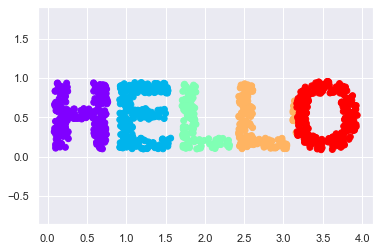

In [3]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

# Multi Dimensional Scaling

In [12]:
%%HTML
<h3>Calculate Pairwise Distances</h3>

(1000, 1000)

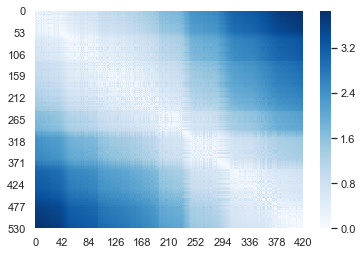

In [11]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
sns.heatmap(D, annot = False, cmap = 'Blues', cbar = True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))
plt.gca().tick_params(axis = 'x', rotation = 0)
D.shape

In [17]:
from sklearn.manifold import MDS 
model = MDS(dissimilarity='precomputed', random_state = 1)
X_new = model.fit_transform(D)
X_new.shape

(1000, 2)

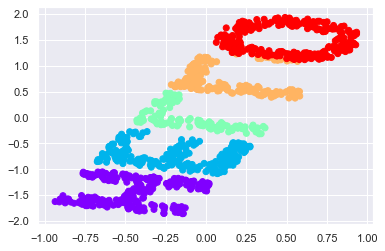

In [18]:
plt.scatter(X_new[:,0], X_new[:,1], **colorize)

## Nonlinear Embeddings: Where MDS Fails

In [22]:
%%HTML
<h3>Create a S curve of Hello World</h3>

In [19]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

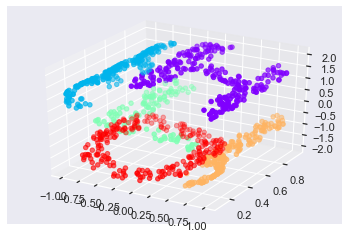

In [21]:
from mpl_toolkits import mplot3d
ax = plt.subplot(projection = '3d')
ax.scatter(XS[:, 0], XS[:,1], XS[:,2], **colorize)

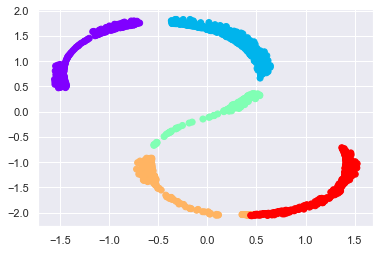

In [23]:
model = MDS(n_components = 2)
X_new = model.fit_transform(XS)
plt.scatter(X_new[:,0], X_new[:,1], **colorize)

# Locally Linear Embedding (LLE)

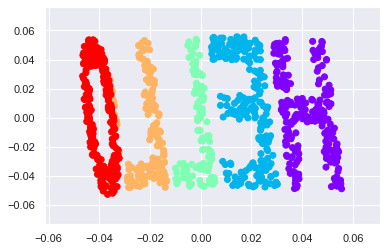

In [34]:
from sklearn.manifold import LocallyLinearEmbedding
LocallyLinearEmbedding?
model = LocallyLinearEmbedding(n_components = 2, n_neighbors = 100, method = 'modified')
X_new = model.fit_transform(XS)
plt.scatter(X_new[:,0], X_new[:,1], **colorize)

In [37]:
%%HTML
<style>
mark {
    background: teal;
    color: white;
    padding: 3px 5px;
}
</style>
<h2><mark>TIP</mark>:the only clear advantage of manifold learning methods over PCA is their ability to preserve nonlinear relationships in the data; for that reason I tend to explore data with manifold methods only after first exploring them with PCA.</h2>